## Os exercícios abaixo referem-se a base de dados “Risco de ataque cardíaco”

Obtenha o modelo utilizando os 10 primeiros exemplos da base de dados. Calcule e apresente o erro
quadrático médio aplicando o modelo de regressão nos mesmos 10 primeiros exemplos da base de
dados. Depois calcule e apresente o erro quadrático médio do modelo de regressão obtido nos demais
exemplos. Argumente se o modelo tem ou não uma boa capacidade de predição em novos exemplos.

In [19]:
#Base de Dados:
database = {
"idade" : [10,12,14,16,18,20,22,24,26,28,
           30,32,34,36,38,40,44,50,60,70],
"prob_attack" : [0.05, 0.06, 0.07, 0.08, 0.10, 0.10, 0.11, 0.12, 0.12, 0.12,
                 0.18, 0.20, 0.21, 0.21, 0.23, 0.28, 0.40, 0.50, 0.60, 0.70]
}


In [20]:
# Imports

from __future__ import unicode_literals

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from math import sqrt
%matplotlib inline

## Utilizando os 10 primeiros exemplos da base de dados

In [21]:
x = database['idade'][:10]
y = database['prob_attack'][:10]
n = len(x)

xy = np.multiply(x, y)
xx = np.multiply(x, x)
yy = np.multiply(y, y)

Precisamos calcular os valores de  $\beta_0$ e  $\beta_1$ que compõem a equação:

$\hat{y} = \beta_0 + \beta_1x$

Onde:

- $\hat{y}$ é a variável aleatória
- $x$ variável independete
- $\beta_0$ interceptação
- $\beta_1$ coeficiente de inclinação


\begin{equation*}
\beta_0 = \frac{n \sum_{}(xy) - \sum_{}(x)\sum_{}(y)}{n\sum_{}(x^{2}) - (\sum_{}(x))^{2}}
\end{equation*}

\begin{equation*}
\beta_1 = \frac{n\sum_{}(y)\sum_{}(xx) - \sum_{}(x)\sum_{}(y)} {n\sum_{}(x^{2}) - (\sum_{}(x))^{2}}
\end{equation*}

In [22]:
b0 = float(( n*(sum(xy)) - sum(x)*sum(y))) / ( (n*sum(xx) - sum(x)**2) )
print b0

0.00421212121212


In [23]:
b1 = float(( sum(y)*sum(xx) - sum(x)*sum(xy) ))  /  ( n*(sum(xx)) - sum(x)**2 )
print b1

0.0129696969697


In [24]:
y_hat = map(lambda xi : b0*xi+b1, x)

[]

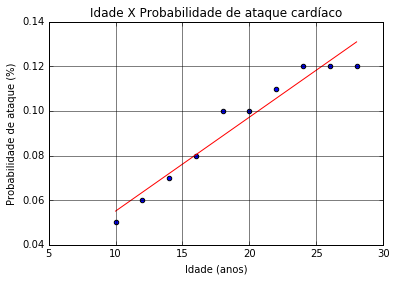

In [25]:
x = np.array(x)
y = np.array(y)
y_hat = np.array(y_hat)

fig, ax = plt.subplots()

reg_line = ax.plot(x, y_hat, color='red', label='modelo de regressão')

ax.grid(True, linestyle='-')

ax.scatter(x, y)

plt.xlabel('Idade (anos)')
plt.ylabel('Probabilidade de ataque (%)')
plt.title("Idade X Probabilidade de ataque cardíaco")
plt.plot()

O **Coeficiente de Determinação** $R^{2}$ pode ser obtido pela fórmula:

\begin{equation*}
R^{2} = \frac{\sum{}(\hat{y_i}-\bar{y})^{2}} {\sum{}(y_i-\bar{y})^{2}}
\end{equation*}

O erro quadrático médio para os mesmos 10 primeiros exemplos é, portando:

In [26]:
y_median = float(sum(y))/n
r2 = sum(map( lambda yi_hat : (yi_hat-y_median)**2, y_hat)) / sum(map( lambda yi : (yi-y_median)**2, y))
print "Erro médio quadrático : %.2f%%"%(r2*100)

Erro médio quadrático : 94.28%


## Utilizando os 10 útimos exemplos da base de dados

In [27]:
y_remaining = database['prob_attack'][10:]
x_remaining = database['idade'][10:]

all_x = database['idade']
all_y = database['prob_attack']
all_y_hat = map(lambda xi : b0*xi+b1, all_x)

y_median = float(sum(all_y))/(n*2)
all_y_hat = map(lambda xi : b0*xi+b1, all_x)

r2 = sum(map( lambda yi_hat : (yi_hat-y_median)**2, all_y_hat)) / sum(map( lambda yi : (yi-y_median)**2, all_y))
print "Erro médio quadrático : %.2f%%"%(r2*100)

Erro médio quadrático : 31.28%


[]

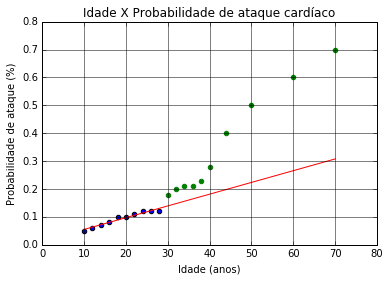

In [28]:
all_x = database['idade']
all_y = database['prob_attack']
all_y_hat = map(lambda xi : b0*xi+b1, all_x)

all_n = len(all_x)
all_x = np.array(all_x)
all_y = np.array(all_y)


fig, ax = plt.subplots()

reg_line = ax.plot(all_x, all_y_hat, color='red', label='modelo de regressão')

ax.grid(True, linestyle='-')

ax.scatter(x, y)
ax.scatter(x_remaining, y_remaining, color='green')

plt.xlabel('Idade (anos)')
plt.ylabel('Probabilidade de ataque (%)')
plt.title("Idade X Probabilidade de ataque cardíaco")
plt.plot()

Podemos notar pelo valor do erro quadrático e pela discrepância de predições com relação aos 10 últmos exemplos (plotados em verde) que esse modelo não possui boa capacidade de predição para novos casos.